In [41]:
#importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')

sns.set(style="whitegrid")

In [42]:
#cargo csv
events = pd.read_csv('./data/events.csv', low_memory=False)
pd.set_option('display.max_columns', 51)
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,'Cantidad de checkouts segun condicion')

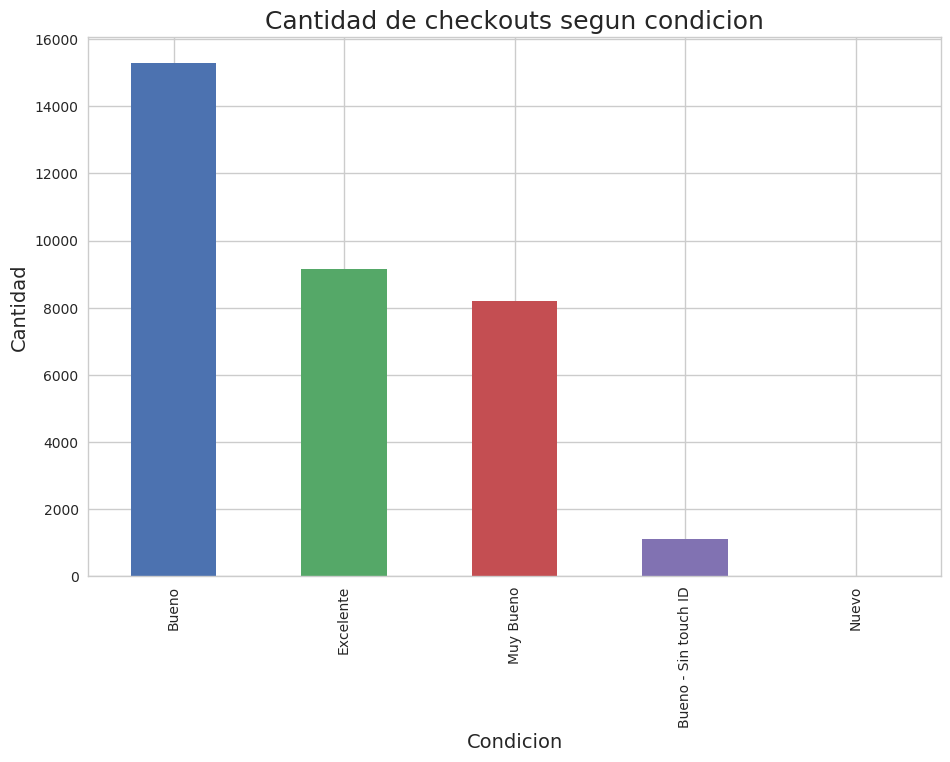

In [43]:
p = events.loc[events['event'] == 'checkout']['condition'].value_counts().plot.bar(figsize=(11,7))
p.set_xticklabels(['Bueno', 'Excelente', 'Muy Bueno', 'Bueno - Sin touch ID', 'Nuevo'])
p.set_ylabel('Cantidad', fontsize=14)
p.set_xlabel('Condicion', fontsize=14)
p.set_title('Cantidad de checkouts segun condicion', fontsize=18)

Text(0.5,1,'Cantidad de conversiones segun condicion del dispositivo')

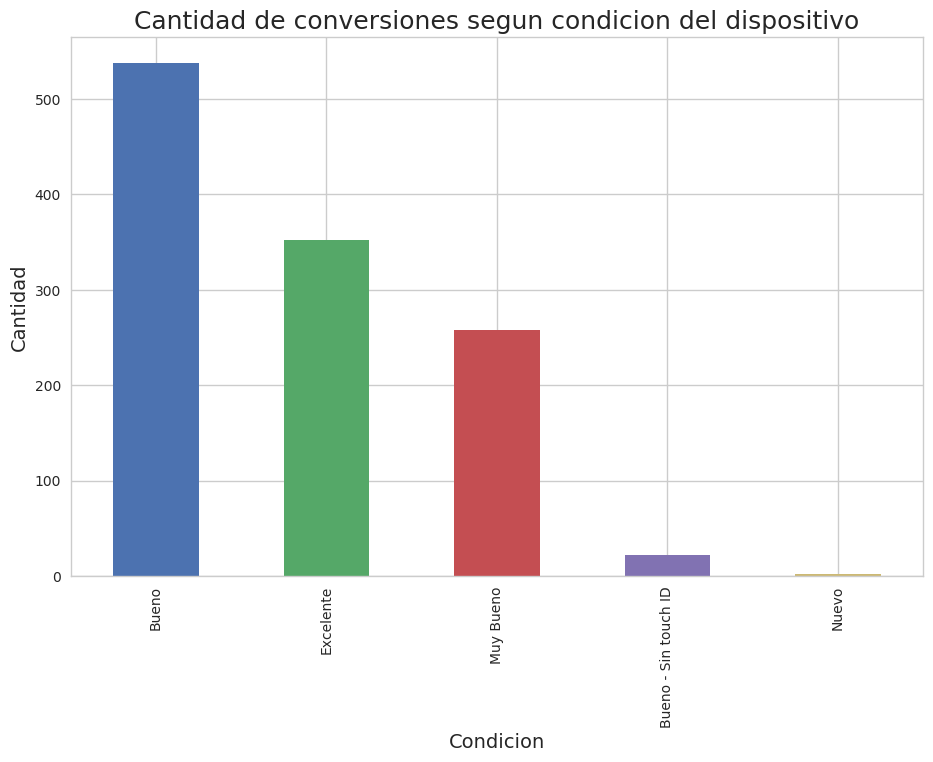

In [45]:
p = events.loc[events['event'] == 'conversion']['condition'].value_counts().plot.bar(figsize=(11,7))
p.set_xticklabels(['Bueno', 'Excelente', 'Muy Bueno', 'Bueno - Sin touch ID', 'Nuevo'])
p.set_ylabel('Cantidad', fontsize=14)
p.set_xlabel('Condicion', fontsize=14)
p.set_title('Cantidad de conversiones segun condicion del dispositivo', fontsize=18)

In [61]:
events_short = events.loc[events['event'] == 'conversion']
grouped = events_short.groupby(['model','condition']).agg({'person':'count'})

In [62]:
grouped = grouped.unstack().fillna(value=0)
grouped = grouped.stack()
grouped.sort_values(by='person', inplace=True)

In [63]:
#grouped = grouped.unstack()
#grouped = grouped.fillna(value=0)

In [64]:
#grouped = grouped.stack()

In [65]:
grouped = grouped.pivot_table(index='model', columns='condition', values='person')

In [66]:

grouped['Total'] = grouped.sum(axis=1)
grouped.sort_values(by='Total', inplace=True, ascending=False)

In [67]:
grouped.drop(columns=['Total'], inplace=True)

[Text(0.5,0,'Bueno'),
 Text(1.5,0,'Bueno-Sin Touch ID'),
 Text(2.5,0,'Excelente'),
 Text(3.5,0,'Muy Bueno'),
 Text(4.5,0,'Nuevo')]

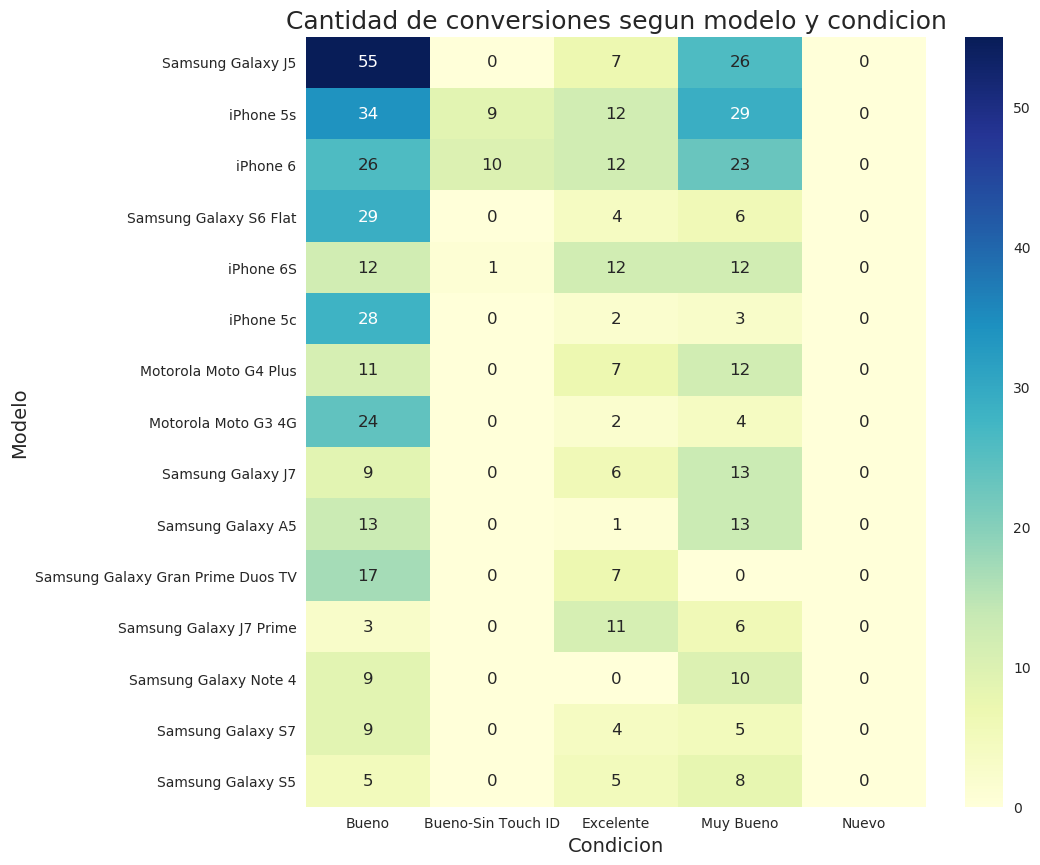

In [68]:
fig, ax = plt.subplots(figsize=(10,10))   
h = sns.heatmap(grouped.head(15), cmap="YlGnBu", ax=ax, annot=True)
h.set_title('Cantidad de conversiones segun modelo y condicion', fontsize=18)
h.set_xlabel('Condicion', fontsize=14)
h.set_ylabel('Modelo', fontsize=14)
h.set_xticklabels(['Bueno', 'Bueno-Sin Touch ID', 'Excelente', 'Muy Bueno', 'Nuevo'])

In [69]:
events_short = events.loc[events['event'] == 'checkout']
grouped = events_short.groupby(['model','condition']).agg({'person':'count'})
grouped = grouped.unstack().fillna(value=0)
grouped = grouped.stack()
#grouped.sort_values(by='person', inplace=True)
grouped = grouped.pivot_table(index='model', columns='condition', values='person')
grouped['Total'] = grouped.sum(axis=1)
grouped.sort_values(by='Total', inplace=True, ascending=False)
grouped.drop(columns=['Total'], inplace=True)

In [70]:
grouped

condition,Bom,Bom - Sem Touch ID,Excelente,Muito Bom,Novo
model,,,,,
iPhone 6,1537.0,299.0,824.0,635.0,0.0
iPhone 5s,647.0,729.0,522.0,846.0,0.0
iPhone 6S,822.0,25.0,780.0,681.0,0.0
Samsung Galaxy J5,1352.0,0.0,189.0,377.0,0.0
Samsung Galaxy S7,652.0,0.0,398.0,184.0,0.0
iPhone 7,401.0,0.0,444.0,360.0,0.0
Samsung Galaxy S8,572.0,0.0,341.0,161.0,0.0
iPhone 7 Plus,184.0,0.0,445.0,295.0,0.0
Samsung Galaxy J7 Prime,324.0,0.0,338.0,204.0,0.0


[Text(0.5,0,'Bueno'),
 Text(1.5,0,'Bueno-Sin Touch ID'),
 Text(2.5,0,'Excelente'),
 Text(3.5,0,'Muy Bueno'),
 Text(4.5,0,'Nuevo')]

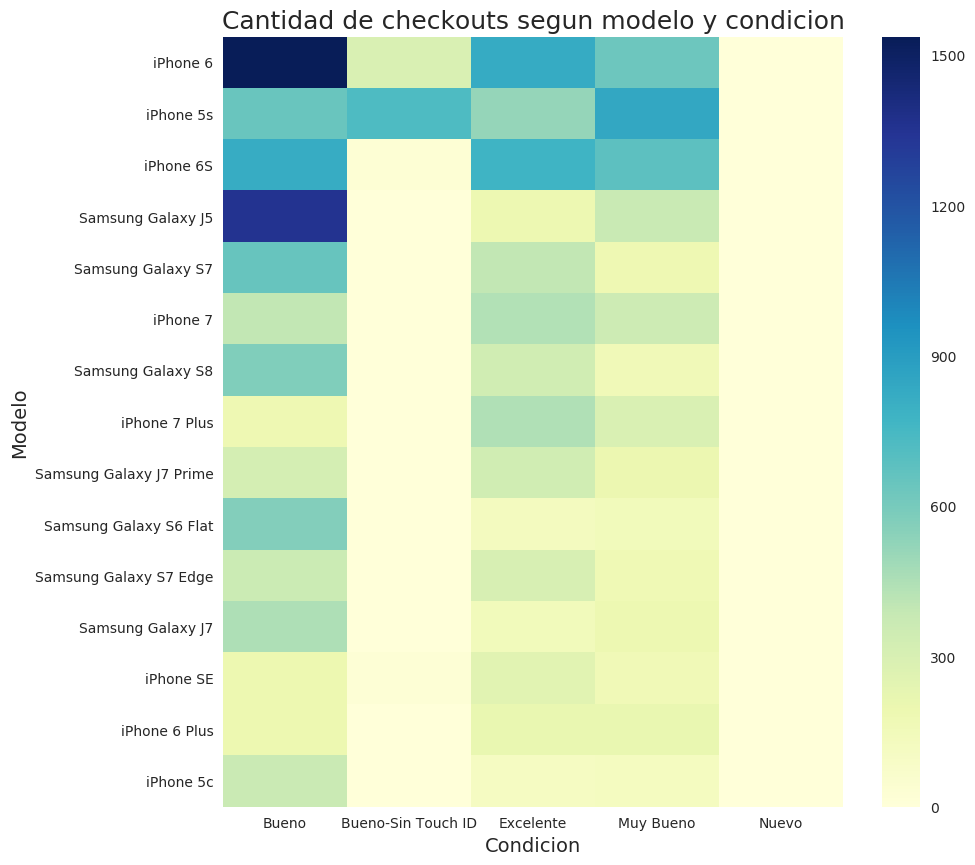

In [71]:
fig, ax = plt.subplots(figsize=(10,10))   
h = sns.heatmap(grouped.head(15), cmap="YlGnBu", ax=ax)
h.set_title('Cantidad de checkouts segun modelo y condicion', fontsize=18)
h.set_xlabel('Condicion', fontsize=14)
h.set_ylabel('Modelo', fontsize=14)
h.set_xticklabels(['Bueno', 'Bueno-Sin Touch ID', 'Excelente', 'Muy Bueno', 'Nuevo'])